# Project: Wrangling and Analyze Data

#Installing the tweepy libraries if it is not install
!pip install tweepy
!pip install notebook --upgrade
!pip install git+https://github.com/tweepy/tweepy.git

In [1]:
#Importation of libraries to used in this project
import pandas as pd
import numpy as np
import tweepy as tp
import requests as re
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_arc_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [3]:
twitter_arc_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = re.get(url)
print(response)

<Response [200]>


In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
image_pred = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

In [8]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

from tweepy.auth import OAuthHandler

In [9]:
tweet = []

with open('tweet_json.txt', 'r') as file:
    for tweet_id in file:
        data = json.loads(tweet_id) # turn the item to a python dictionary
        tweet.append(data)

In [10]:
tweet_df = pd.DataFrame(tweet, columns = ['id', 'retweet_count', 'favorite_count'])

In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
id                2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [12]:
tweet_df.duplicated().sum()

0

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [13]:
twitter_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_arc_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

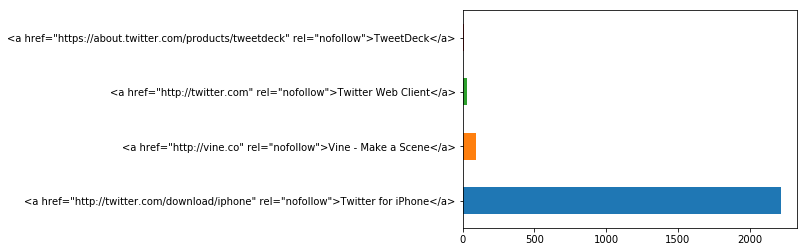

In [15]:
twitter_arc_df.source.value_counts().plot(kind='barh')

In [16]:
print(twitter_arc_df.floofer.value_counts())
print(twitter_arc_df.doggo.value_counts())
print(twitter_arc_df.pupper.value_counts())
print(twitter_arc_df.puppo.value_counts())
print(twitter_arc_df.columns)

None       2346
floofer      10
Name: floofer, dtype: int64
None     2259
doggo      97
Name: doggo, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


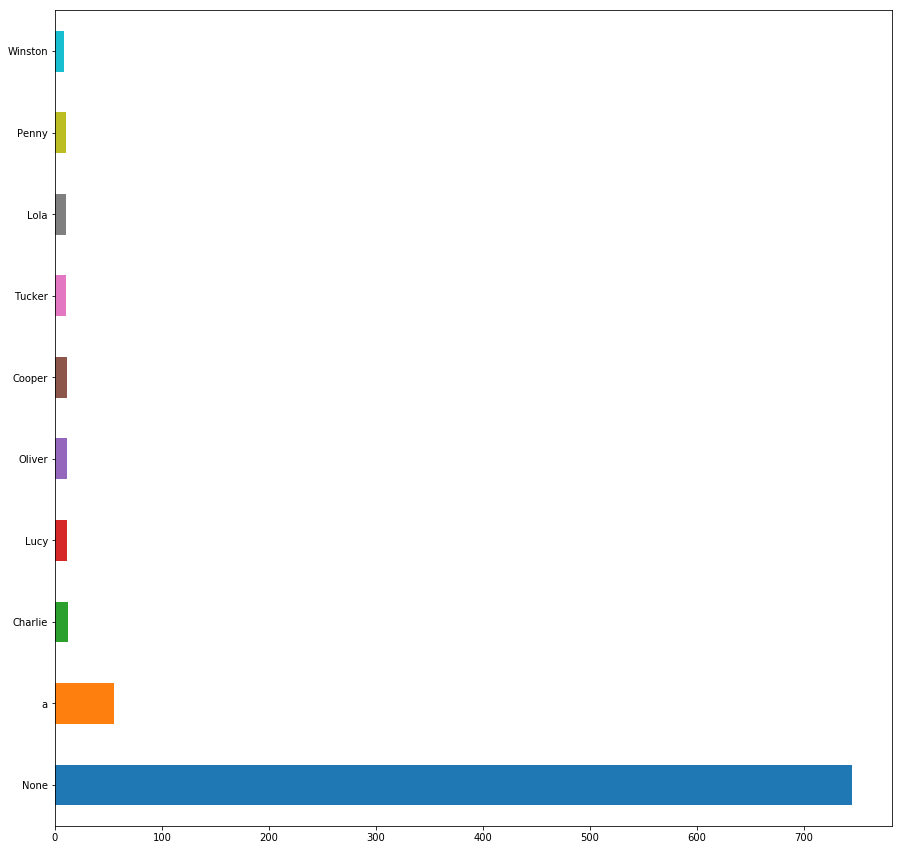

In [17]:
twitter_arc_df['name'].value_counts().head(10).plot(kind='barh', figsize=((15,15)))

In [18]:
twitter_arc_df.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1                                                                                                        2
https://twitter.com/dog_rates/status/773308824254029826/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/759923798737051648/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/819227688460238848/photo/1                                              

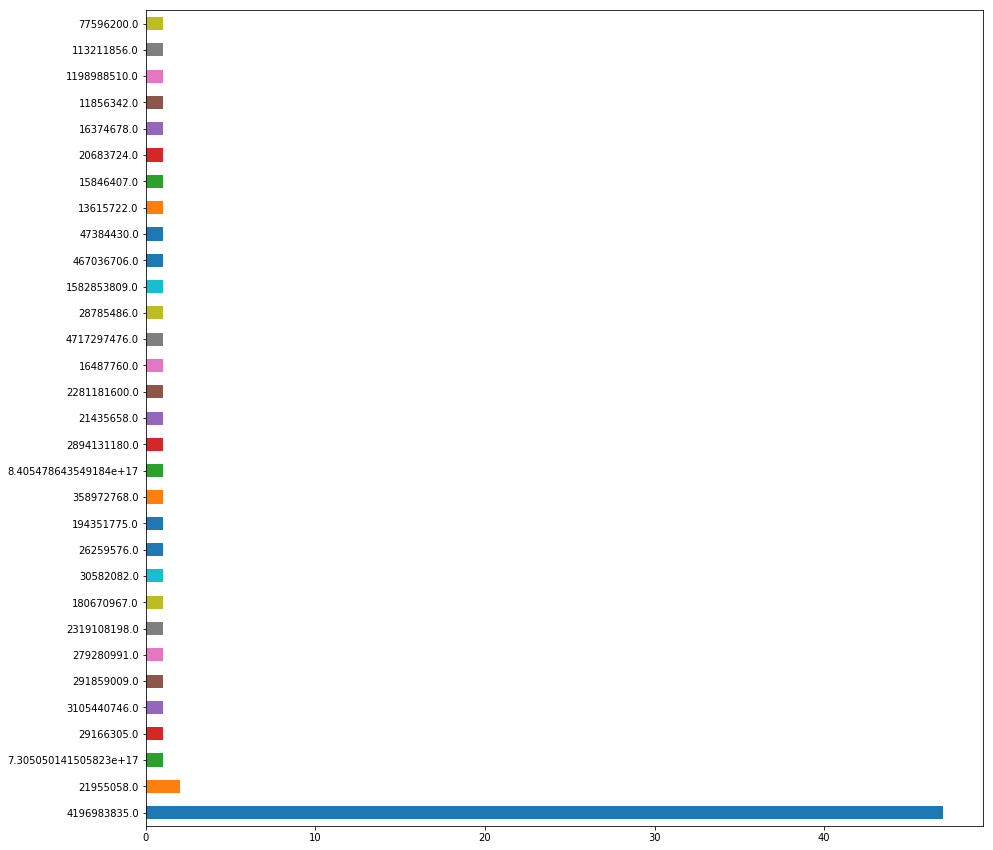

In [19]:
twitter_arc_df.in_reply_to_user_id.value_counts().plot(kind='barh', figsize=((15,15)))

In [20]:
pd.set_option('display.max_colwidth', 350)

In [21]:
twitter_arc_df['text'].sample(20)

440                                                  Here we have a doggo who has messed up. He was hoping you wouldn't notice. 11/10 someone help him https://t.co/XdRNXNYD4E
226                            Please stop sending in animals other than dogs. We only rate dogs. Not Furry Ecuadorian Sea Turtles. Thank you... 12/10 https://t.co/UOE79zb6VU
1928                                 Herd of wild dogs here. Not sure what they're trying to do. No real goals in life. 3/10 find your purpose puppers https://t.co/t5ih0VrK02
1511                                                               I present to you... Dog Jesus. 13/10 (he could be sitting on a rock but I doubt it) https://t.co/fR1P3g5I6k
2131                             "Hi yes this is dog. I can't help with that s- sir please... the manager isn't in right n- well that was rude"\n10/10 https://t.co/DuQXATW27f
73                              RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL

In [22]:
twitter_arc_df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Toby           7
an             7
Bailey         7
Buddy          7
Koda           6
Stanley        6
Milo           6
Bella          6
Rusty          6
Scout          6
Oscar          6
Dave           6
Jack           6
Leo            6
Jax            6
Louis          5
            ... 
Edd            1
Pancake        1
Kathmandu      1
Timmy          1
Kramer         1
Reagan         1
Shikha         1
Hero           1
Barney         1
Grey           1
Tycho          1
Holly          1
Glacier        1
Sailor         1
Zeus           1
Nico           1
Bonaparte      1
Jarvis         1
Koko           1
Olaf           1
Fletcher       1
Darla          1
Mingus         1
Bones          1
Jebberson      1
Richie         1
Buckley        1
Rascal        

In [23]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_pred.jpg_url.sample(15)

739     https://pbs.twimg.com/media/CYkrNIVWcAMswmP.jpg
945     https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg
621     https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg
1534    https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg
89      https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg
1208    https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg
1996    https://pbs.twimg.com/media/DCN85nGUwAAzG_q.jpg
998     https://pbs.twimg.com/media/CdT9n7mW0AQcpZU.jpg
1923    https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg
1232    https://pbs.twimg.com/media/ClqGl7fXIAA8nDe.jpg
854     https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg
1288    https://pbs.twimg.com/media/CmzRRY1WcAEoxwY.jpg
1853    https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg
1450    https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg
1840    https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg
Name: jpg_url, dtype: object

In [25]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
id                2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [26]:
twitter_arc_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [27]:
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7010,33829
1,892177421306343426,5302,29343
2,891815181378084864,3482,22066
3,891689557279858688,7227,36955
4,891327558926688256,7767,35326


In [28]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
twitter_arc_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
tweet_df.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2472.582295,7058.257413
std,6.820795e+16,4187.481973,10967.987305
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1225.500000
50%,7.178418e+17,1149.000000,3054.000000
75%,7.986547e+17,2863.500000,8612.500000
max,8.924206e+17,70792.000000,144966.000000


In [31]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
print('checking the duplicates for image prediction dataframe', image_pred.duplicated().sum())
print('checking the duplicates for twitter archive dataframe', twitter_arc_df.duplicated().sum())
print('checking the duplicates for twitter API dataframe', tweet_df.duplicated().sum())

checking the duplicates for image prediction dataframe 0
checking the duplicates for twitter archive dataframe 0
checking the duplicates for twitter API dataframe 0


### Quality issues
1. The timestamp column is not in datetime data type and needs to be converted to datetime

2. Removing the jpg_url columns from the image prediction

3. The source columns has tags included and needs to stripped to get only the text

4. Dropping the expanded_url column

5. The denominator column need to be dropped since we already know it has a static value which is 10

6. The P columns in the image prediction needs to be reduced or transformed to fewer columns

7. The image number column should be dropped

8. Removing the retweet_user_id and retweet_status_user_id 

### Tidiness issues
1. The  'doggo', 'floofer', 'pupper', 'puppo' needs to put in one column and dropping the individual columns

2. The in_reply_to_status_id and in_reply_to_user_id have a lot of missing data

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
clean_twitter_arc_df = twitter_arc_df.copy()
clean_image_pred = image_pred.copy()
clean_tweet_df = tweet_df.copy() 

#### Define: Converting the timestamp column in the twitter_arc_df to datetime data type

#### Code

In [34]:
clean_twitter_arc_df['timestamp'] = pd.to_datetime(clean_twitter_arc_df.timestamp)

#### Test

In [35]:
clean_twitter_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### Define: Extracting the text between the a tag on the source column

#### Code

In [36]:
clean_twitter_arc_df['source'] = clean_twitter_arc_df.source.str.replace(r'<[^<>]*>', '', regex=True)

#### Test

In [37]:
clean_twitter_arc_df.source.value_counts();

#### Define: Dropping the denominator column from the twitter archive dataframe

#### Code

In [38]:
#clean_twitter_arc_df.drop(columns=['rating_denominator','retweeted_status_id','retweeted_status_user_id'], inplace=True)
def drop_cols(df, col):
    df.drop(columns=col, inplace=True)


In [39]:
drop_cols(clean_twitter_arc_df, ['rating_denominator','retweeted_status_id','retweeted_status_user_id'])


#### Test

In [40]:
clean_twitter_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 257.8+ KB


#### Define: Reducing the columns to have breed and confidence of the rating

#### Code

In [41]:
dog_stages =[ 'doggo', 'floofer', 'pupper', 'puppo']
clean_twitter_arc_df[dog_stages] = clean_twitter_arc_df[dog_stages].replace('None', np.nan)

def join(x):
    return ', '.join(x.dropna().astype(str)) 

clean_twitter_arc_df['dog_stages'] = clean_twitter_arc_df[dog_stages].apply(join, axis=1)

clean_twitter_arc_df['dog_stages'] = clean_twitter_arc_df['dog_stages'].replace('', np.nan)

#### Test

In [42]:
clean_twitter_arc_df.dog_stages.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stages, dtype: int64

In [43]:
clean_twitter_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dog_stages                    380 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 276.2+ KB


#### Define: Dropping the 'doggo', 'floofer', 'pupper', 'puppo' columns

#### Code

In [44]:
drop_cols(clean_twitter_arc_df, ['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [45]:
clean_twitter_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
name                          2356 non-null object
dog_stages                    380 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 202.5+ KB


#### Define: Combining the columns from image prediction

#### Code

In [46]:
criteria = [(clean_image_pred['p1_dog'] == True), (clean_image_pred['p2_dog'] == True), (clean_image_pred['p3_dog'] == True)]


breed = [( clean_image_pred['p1']), ( clean_image_pred['p2'] ), ( clean_image_pred['p3'] )]

conf_pred =  [( clean_image_pred['p1_conf']), ( clean_image_pred['p2_conf'] ), ( clean_image_pred['p3_conf'] )]

clean_image_pred['breed'] = np.select(criteria, breed, default='none')

clean_image_pred['confidence'] =  np.select(criteria, conf_pred, default=0)

#### Test

In [47]:
clean_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


#### Define: Dropping the 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_timestamp'

#### Code

In [48]:
drop_cols(clean_twitter_arc_df, ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_timestamp'])

#### Test

In [49]:
clean_twitter_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id            2356 non-null int64
timestamp           2356 non-null datetime64[ns]
source              2356 non-null object
text                2356 non-null object
expanded_urls       2297 non-null object
rating_numerator    2356 non-null int64
name                2356 non-null object
dog_stages          380 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 147.3+ KB


#### Define: Dropping the jpg_url column from the image prediction dataframe

#### Code

In [50]:
drop_cols(clean_image_pred, 'jpg_url')

#### Test

In [51]:
clean_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id      2075 non-null int64
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(4)
memory usage: 168.3+ KB


#### Define: Dropping the P columns from the image prediction dataframe

#### Code

In [52]:
drop_cols(clean_image_pred,['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

#### Test

In [53]:
clean_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
img_num       2075 non-null int64
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 64.9+ KB


#### Merging the three dataframes

In [54]:
clean_final_df = pd.concat([clean_twitter_arc_df, clean_tweet_df, clean_image_pred], axis=1, join="inner")

In [55]:
clean_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id            2075 non-null int64
timestamp           2075 non-null datetime64[ns]
source              2075 non-null object
text                2075 non-null object
expanded_urls       2019 non-null object
rating_numerator    2075 non-null int64
name                2075 non-null object
dog_stages          380 non-null object
id                  2075 non-null int64
retweet_count       2075 non-null int64
favorite_count      2075 non-null int64
tweet_id            2075 non-null int64
img_num             2075 non-null int64
breed               2075 non-null object
confidence          2075 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(7), object(6)
memory usage: 243.2+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
clean_final_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [57]:
clean_final_df.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      90
Twitter Web Client       12
TweetDeck                11
Name: source, dtype: int64

In [58]:
clean_final_df.groupby('breed')['retweet_count'].count().sort_values(ascending=False).head(10)

breed
none                  324
golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
pug                    65
toy_poodle             52
chow                   51
Samoyed                46
Pomeranian             42
Name: retweet_count, dtype: int64

In [59]:
clean_final_df.dog_stages.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stages, dtype: int64

### Insights:
1. From the graph, it is clear that most people had the rating on iPhone

2. The golden_retriever is the breed with the most retweet count

3. The pupper has more counts than other dog stages

### Visualization

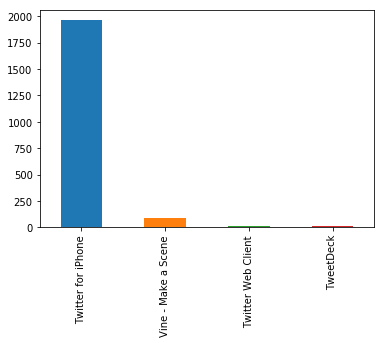

In [60]:
clean_final_df.source.value_counts().plot(kind='bar');

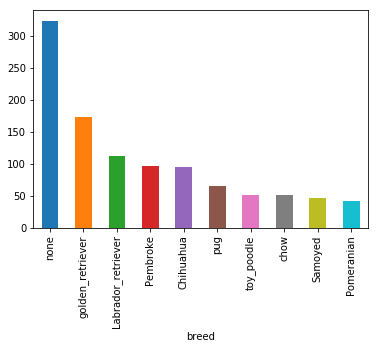

In [61]:
clean_final_df.groupby('breed')['retweet_count'].count().sort_values(ascending=False).head(10).plot(kind='bar');

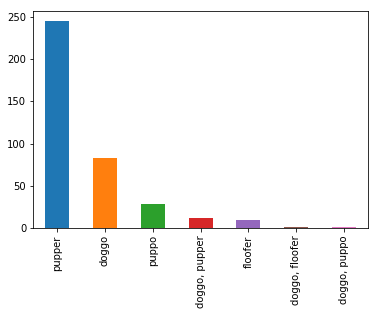

In [62]:
clean_final_df.dog_stages.value_counts().plot(kind='bar');